1. Ручная реализация:
• Используя базовые библиотеки (NumPy), создайте нейронную сеть
с одним скрытым слоем и двумя выходами.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 2)  #100 примеров, 2 входа
Y = np.array([[x[0] + x[1], x[0] - x[1]] for x in X])  #Целевые значения (2 выхода)

input_size = 2
hidden_size = 3
output_size = 2
learning_rate = 0.1
epochs = 1000

#w-веса, b-смещения
W1 = np.random.randn(input_size, hidden_size)
B1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
B2 = np.zeros((1, output_size))

#Активатор
def relu(x):
    return np.maximum(0, x)

#Производная активатора
def relu_proizvodnaya(x):
    return (x > 0).astype(float)

#Ошибка
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
losses = []

• Реализуйте прямое распространение (forward pass) с вычислением
ошибки на основе квадратичной функции потерь.  Реализуйте алгоритм обратного распространения ошибки вручную
(без использования готовых библиотек).

In [2]:
#Обучение
for epoch in range(1, epochs):
    #Прямой проход
    hidden_input = np.dot(X, W1) + B1
    hidden_output = relu(hidden_input)
    final_input = np.dot(hidden_output, W2) + B2
    final_output = final_input  #Линейный выход

    #Вычисление ошибки
    loss = mse_loss(Y, final_output)
    if epoch > 0:
      losses.append(loss)


    #Обратное распространение ошибки
    error = final_output - Y

    #Вычисл градиента выхода
    dW2 = np.dot(hidden_output.T, error) / len(X)
    dB2 = np.mean(error, axis=0, keepdims=True)

    #Вычисл градиента скрытого слоя
    hidden_error = np.dot(error, W2.T) * relu_proizvodnaya(hidden_input)
    dW1 = np.dot(X.T, hidden_error) / len(X)
    dB1 = np.mean(hidden_error, axis=0, keepdims=True)

    #Обновление весов
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss:.4f}')

Epoch 100, Loss: 0.0939
Epoch 200, Loss: 0.0932
Epoch 300, Loss: 0.0930
Epoch 400, Loss: 0.0920
Epoch 500, Loss: 0.0869
Epoch 600, Loss: 0.0669
Epoch 700, Loss: 0.0279
Epoch 800, Loss: 0.0054
Epoch 900, Loss: 0.0009


2.
Визуализация процесса обучения:
• Постройте графики изменения ошибки на каждой итерации
обучения.

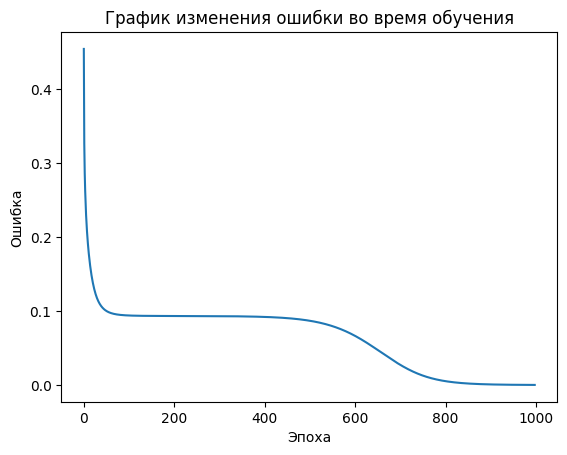

In [3]:
plt.plot(losses[1:])
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.title('График изменения ошибки во время обучения')
plt.show()

• Почему обратное распространение эффективно для глубоких сетей?
• Какие ограничения имеет данный алгоритм (проблемы с
градиентами и их затуханием)?

Обратное распространение эффективно для глубоких сетей, так как использует метод цепного дифференцирования, который позволяет вычислить градиент для всех слоев, исключая определение производных от сложных функций.

Проблемы: исчезающие градиенты (градиенты в больших сетях становятся очень маленькими, приближаясь к 0, от чего ранние слои практически не обучаются).
Также проблема заключается в случаях, когда градиенты становятся огромными, отчего происходит нестабильное обучение.

1.
Применение методов оптимизации:
• Постройте полносвязную нейронную сеть с двумя скрытыми
слоями (можно использовать датасет MNIST или другой).
• Обучите её с использованием следующих оптимизаторов:
• SGD (градиентный спуск)
• Adam
• RMSprop
• Momentum

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Нормализация данных (приведение значений пикселей к диапазону [0, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Преобразование меток в one-hot encoding (бинарный вектор)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def build_model():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  #Входной слой
        layers.Dense(128, activation='relu'),  #Скрытый слой 1
        layers.Dense(64, activation='relu'),   #Скрытый слой 2
        layers.Dense(10, activation='softmax') #Выходной слой
    ])
    return model

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2.
Эксперименты с параметрами:
• Проведите обучение с различными параметрами learning rate (0.01,
0.1, 0.001) и размером мини-выборки (batch size 16, 32, 64).
• Сравните скорость сходимости и итоговую точность на тестовой
выборке.

In [5]:
optimizers = {
    'SGD': tf.keras.optimizers.SGD,
    'Adam': tf.keras.optimizers.Adam,
    'RMSprop': tf.keras.optimizers.RMSprop,
    'Momentum': tf.keras.optimizers.SGD
}
learning_rates = [0.01, 0.1, 0.001]
batch_sizes = [16, 32, 64]

#Обучение моделей
history_dict = {}
for opt_name, opt_class in optimizers.items():
    for lr in learning_rates:
        for batch_size in batch_sizes:
            print(f"Training model with optimizer={opt_name}, lr={lr}, batch_size={batch_size}")

            #Создание модели
            model = build_model()

            #Настройка оптимизатора
            if opt_name == 'Momentum':
                optimizer = opt_class(learning_rate=lr, momentum=0.9)
            else:
                optimizer = opt_class(learning_rate=lr)

            #Компиляция модели
            model.compile(optimizer=optimizer,
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

            #Обучение модели
            history = model.fit(x_train, y_train,
                               epochs=20,  #Количество эпох
                               batch_size=batch_size,  #Размер батча
                               validation_data=(x_test, y_test),
                               verbose=0)

            history_dict[(opt_name, lr, batch_size)] = history

Training model with optimizer=SGD, lr=0.01, batch_size=16


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training model with optimizer=SGD, lr=0.01, batch_size=32
Training model with optimizer=SGD, lr=0.01, batch_size=64
Training model with optimizer=SGD, lr=0.1, batch_size=16
Training model with optimizer=SGD, lr=0.1, batch_size=32
Training model with optimizer=SGD, lr=0.1, batch_size=64
Training model with optimizer=SGD, lr=0.001, batch_size=16
Training model with optimizer=SGD, lr=0.001, batch_size=32
Training model with optimizer=SGD, lr=0.001, batch_size=64
Training model with optimizer=Adam, lr=0.01, batch_size=16
Training model with optimizer=Adam, lr=0.01, batch_size=32
Training model with optimizer=Adam, lr=0.01, batch_size=64
Training model with optimizer=Adam, lr=0.1, batch_size=16
Training model with optimizer=Adam, lr=0.1, batch_size=32
Training model with optimizer=Adam, lr=0.1, batch_size=64
Training model with optimizer=Adam, lr=0.001, batch_size=16
Training model with optimizer=Adam, lr=0.001, batch_size=32
Training model with optimizer=Adam, lr=0.001, batch_size=64
Train

3.
Визуализация:
• Постройте графики изменения ошибки и точности на обучающей и
тестовой выборках для каждого метода оптимизации.

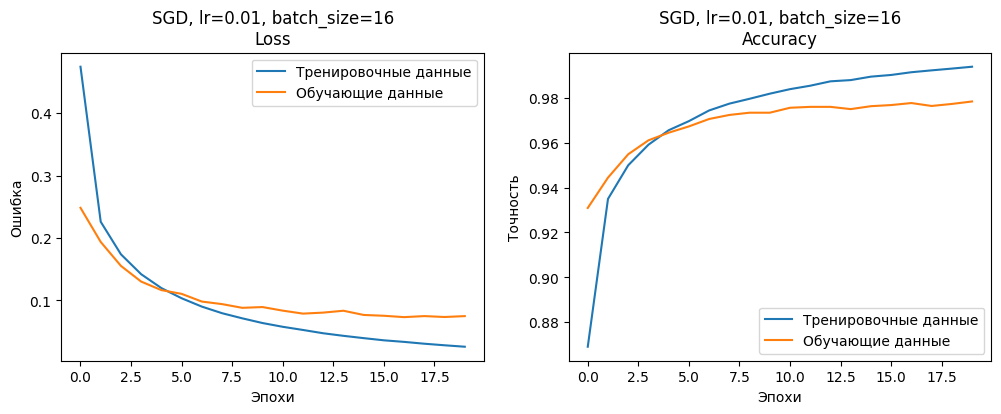

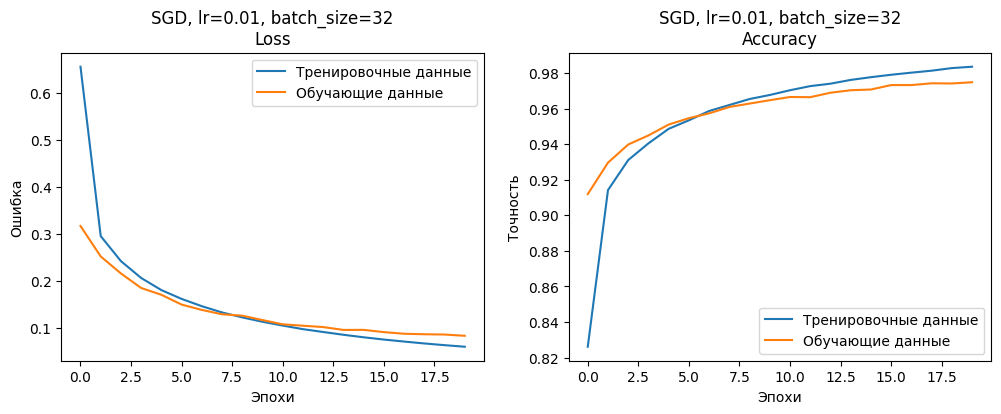

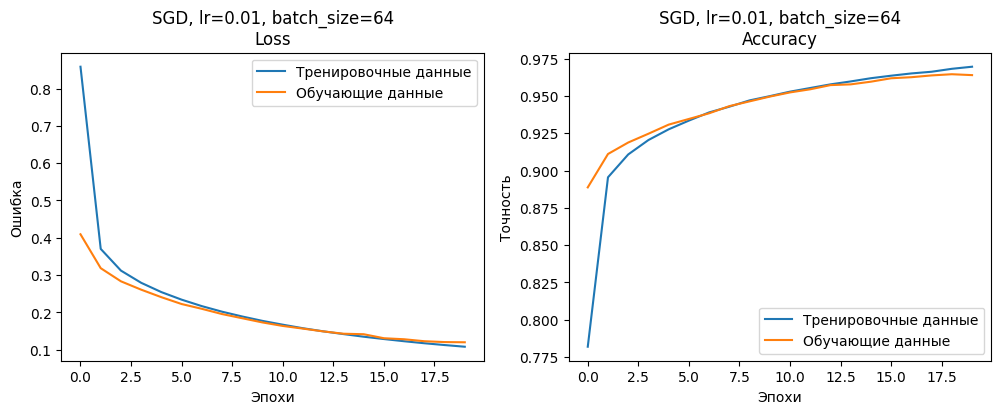

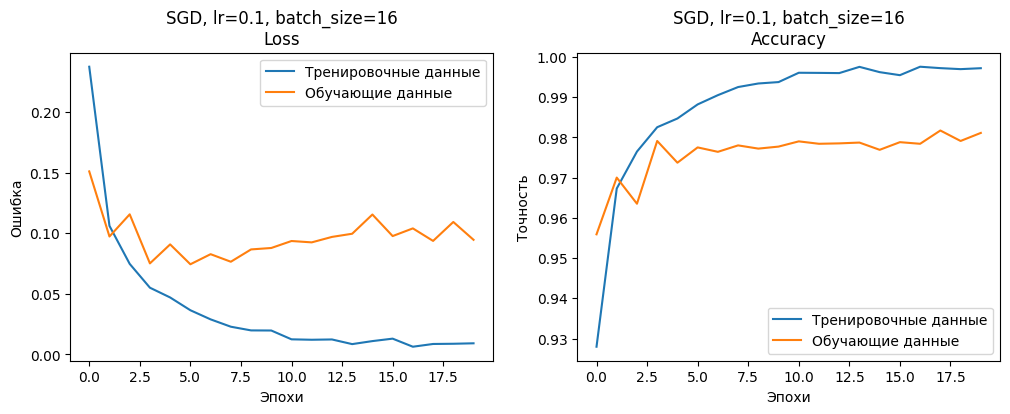

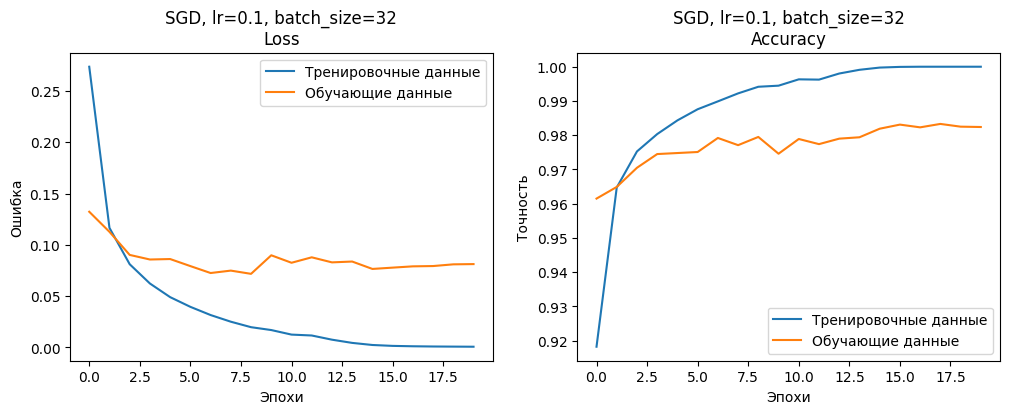

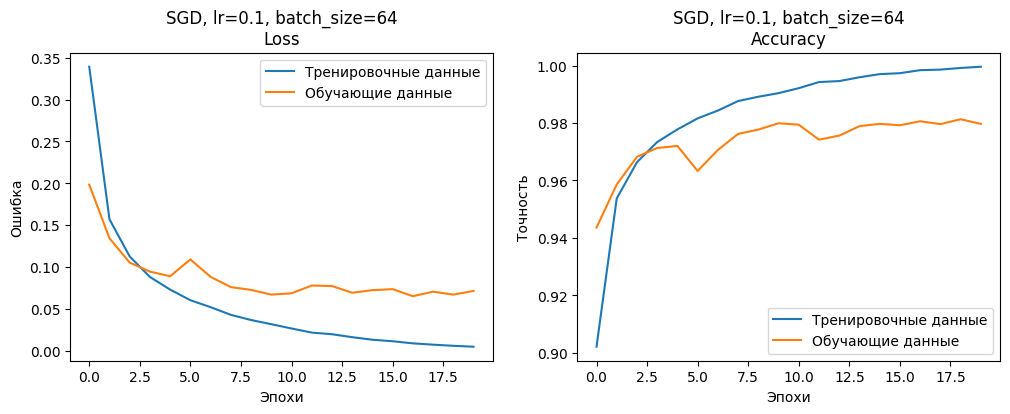

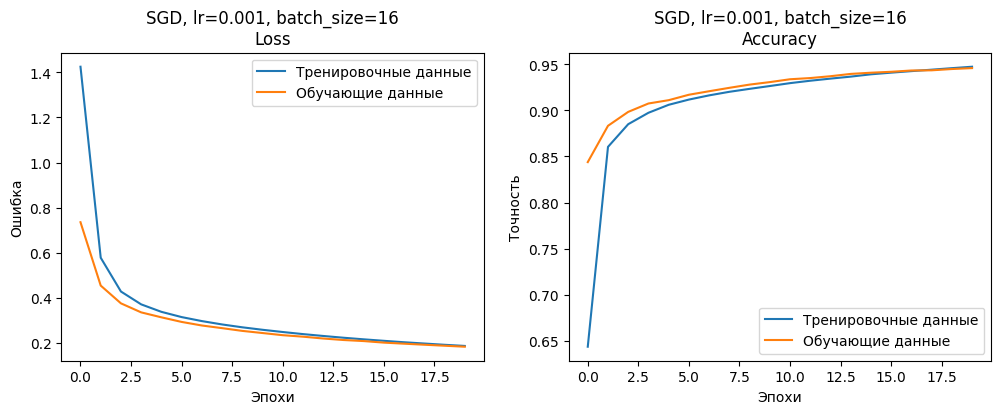

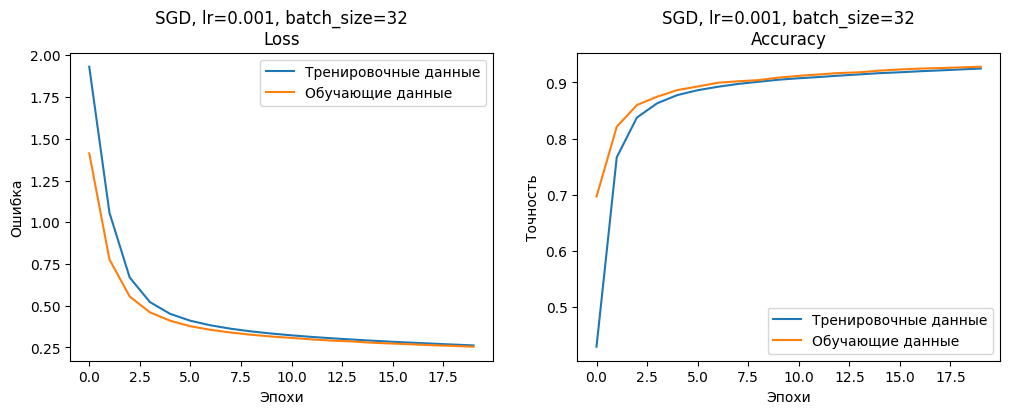

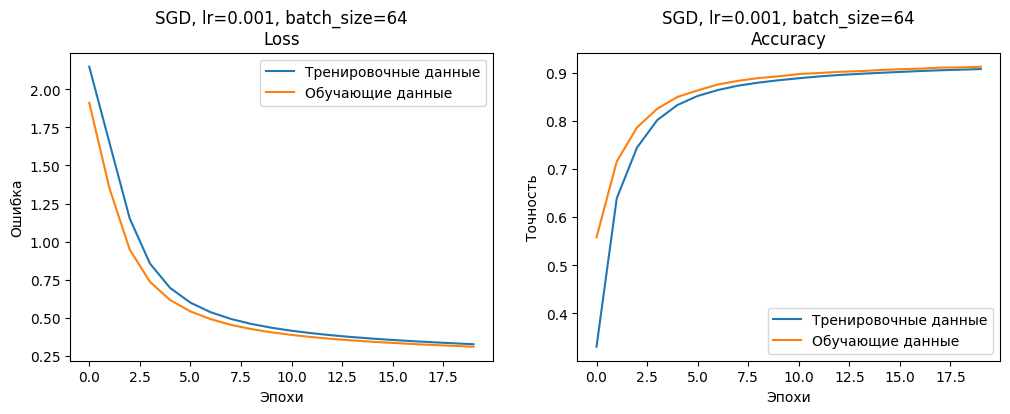

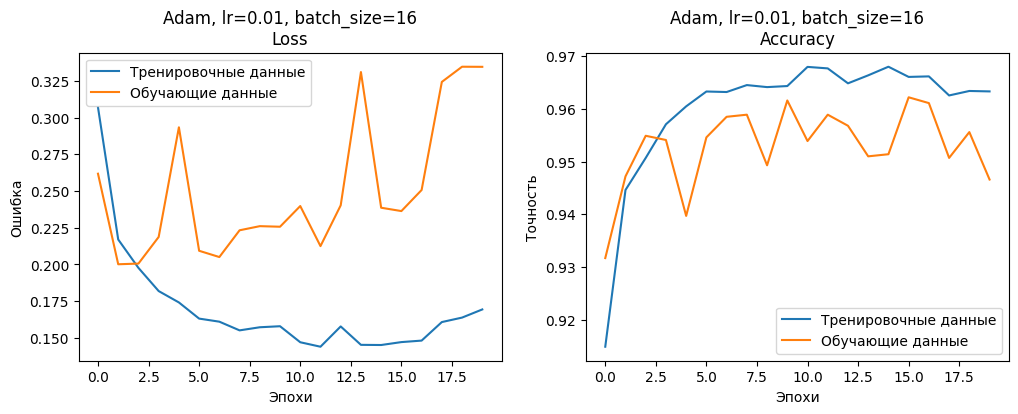

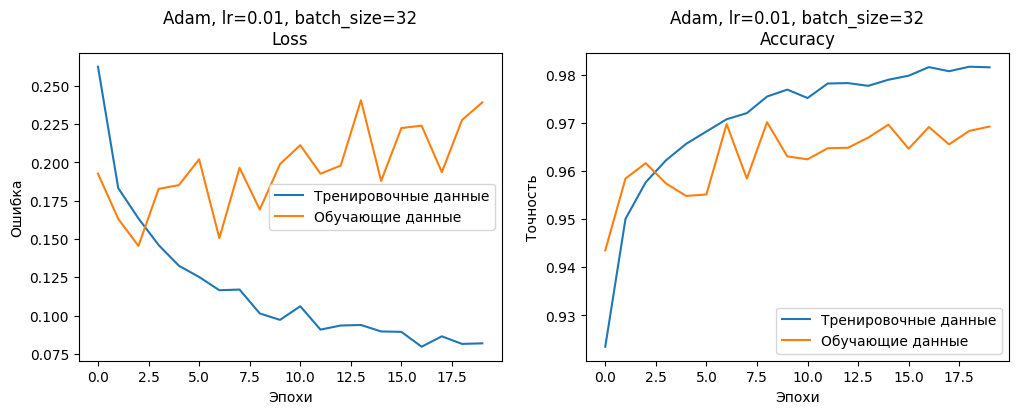

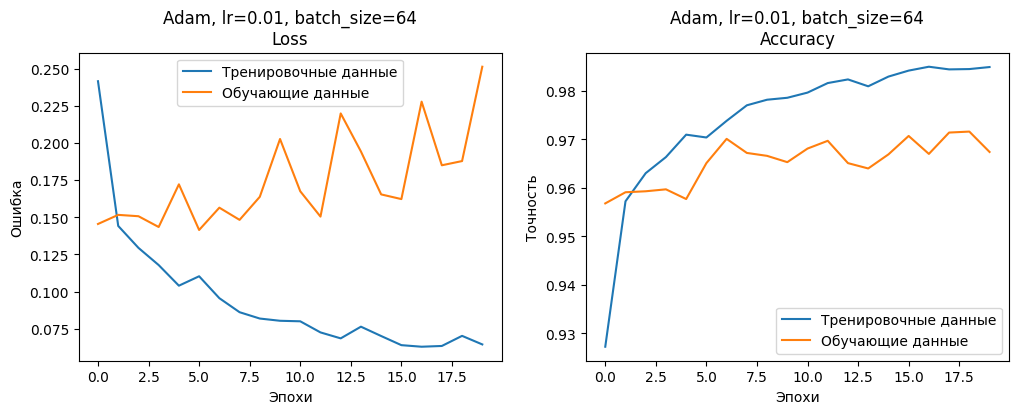

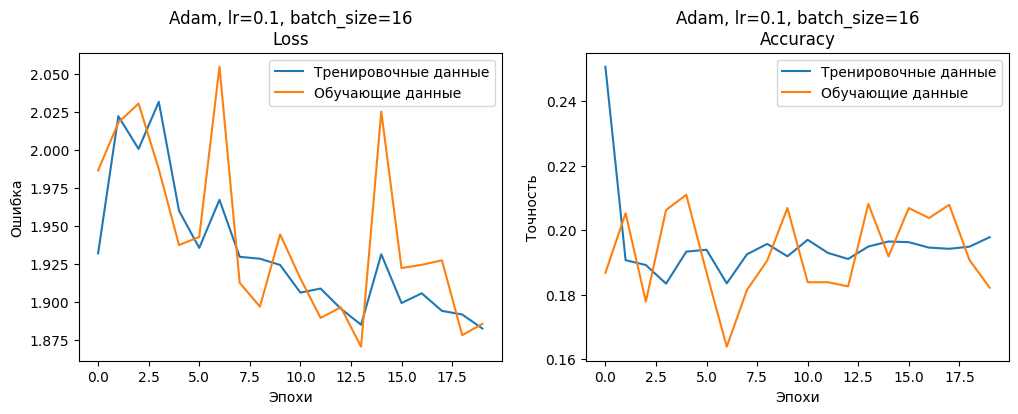

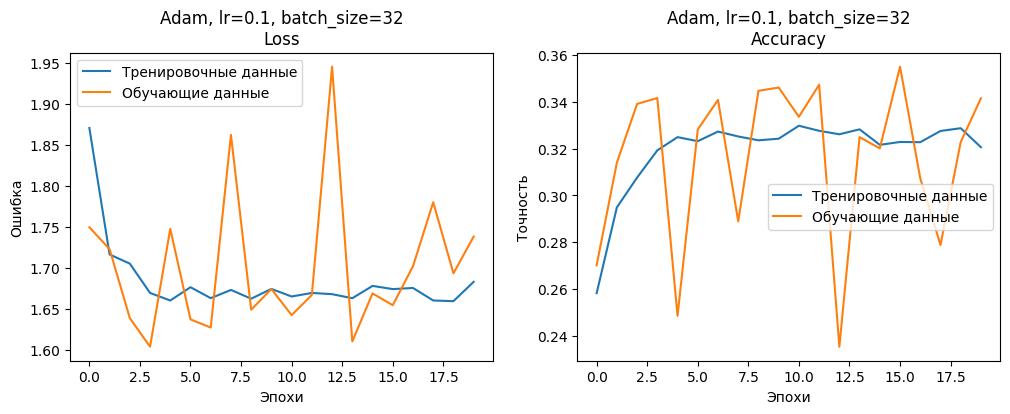

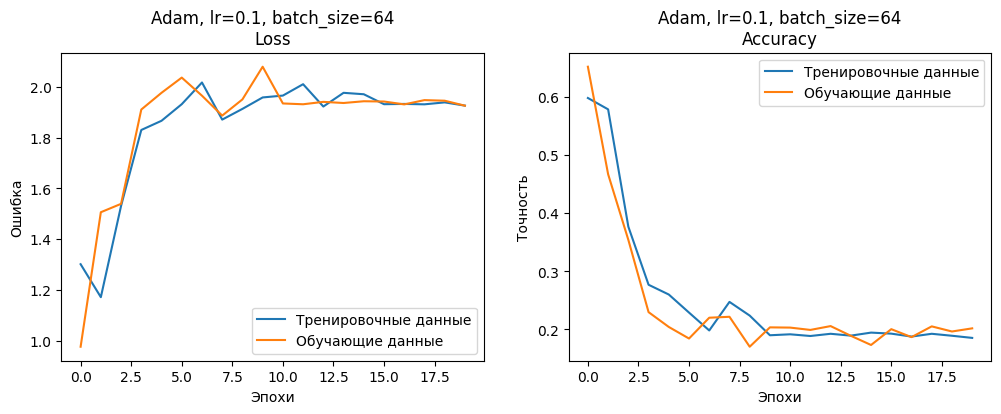

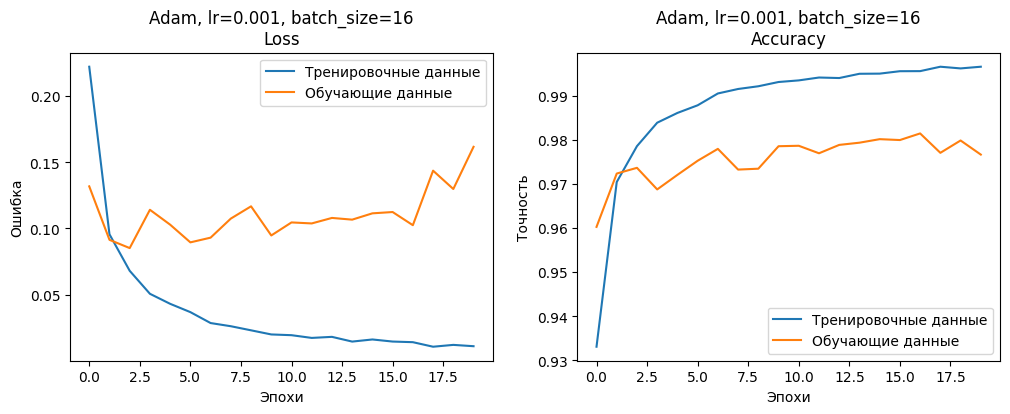

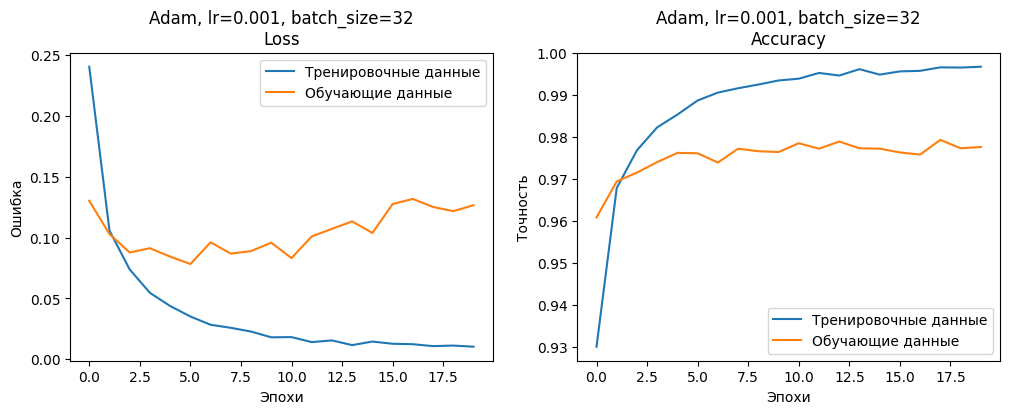

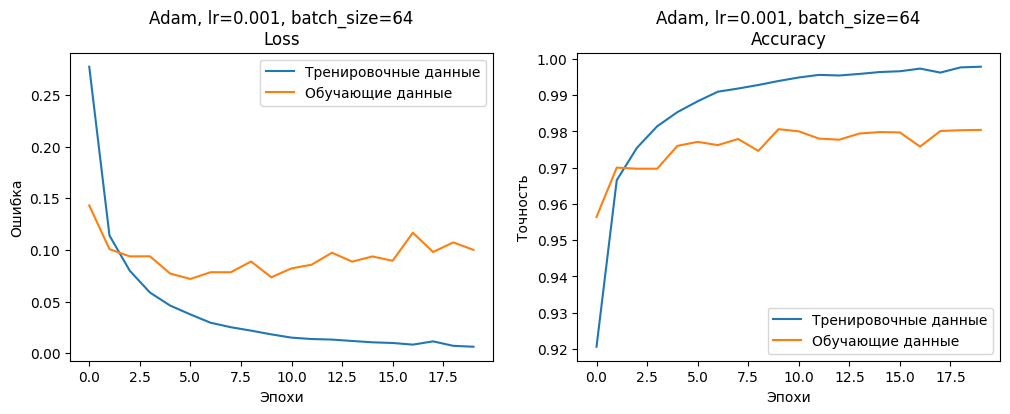

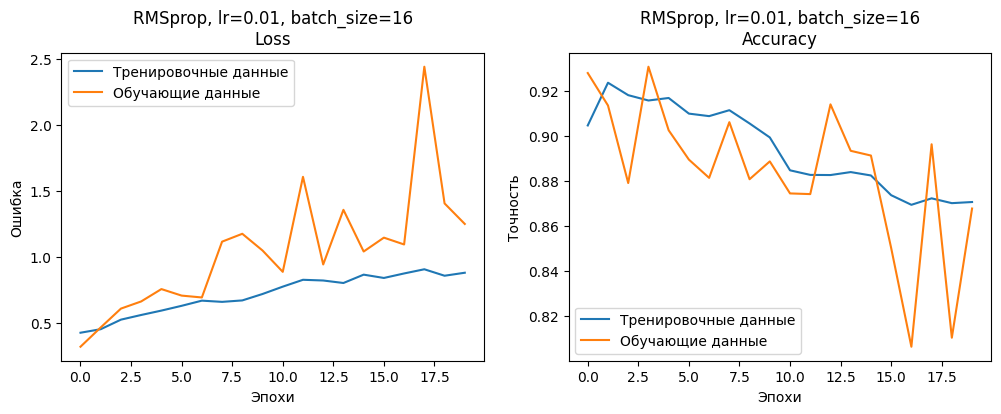

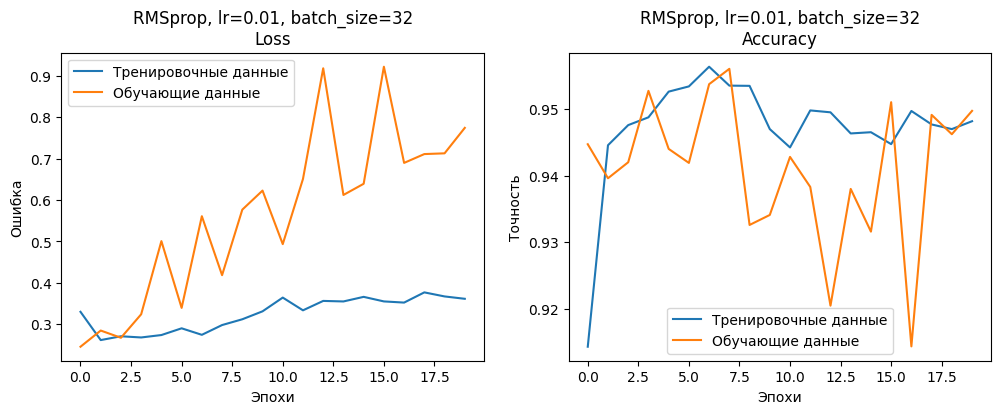

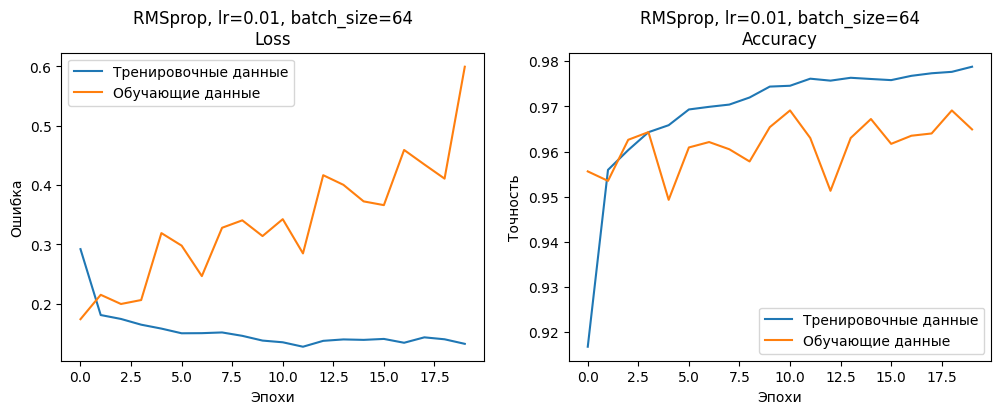

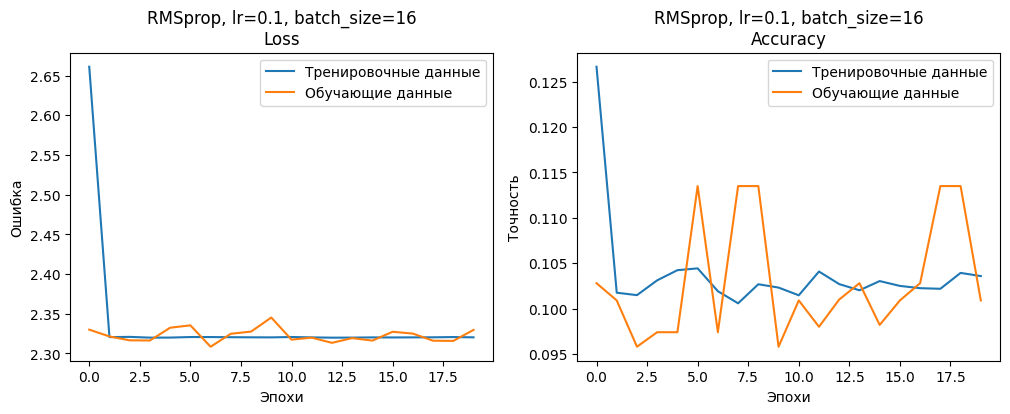

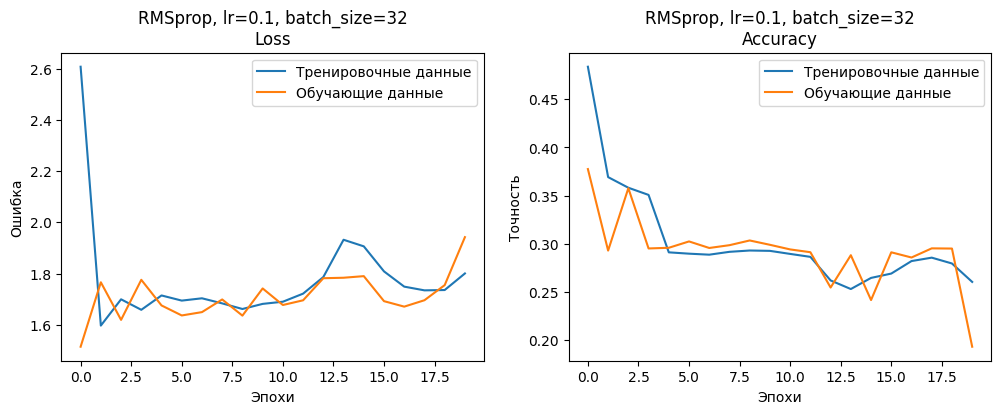

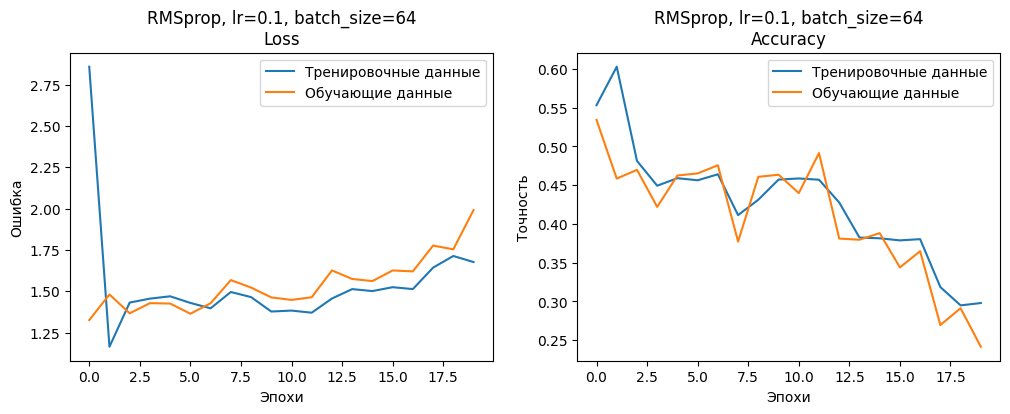

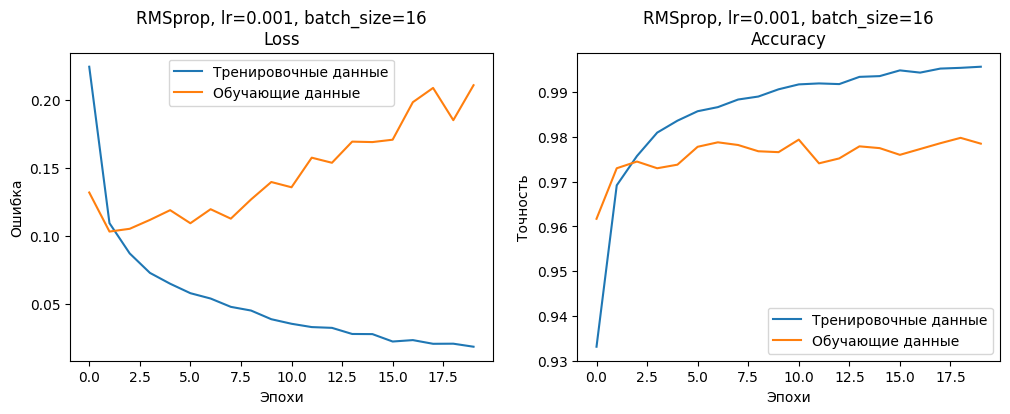

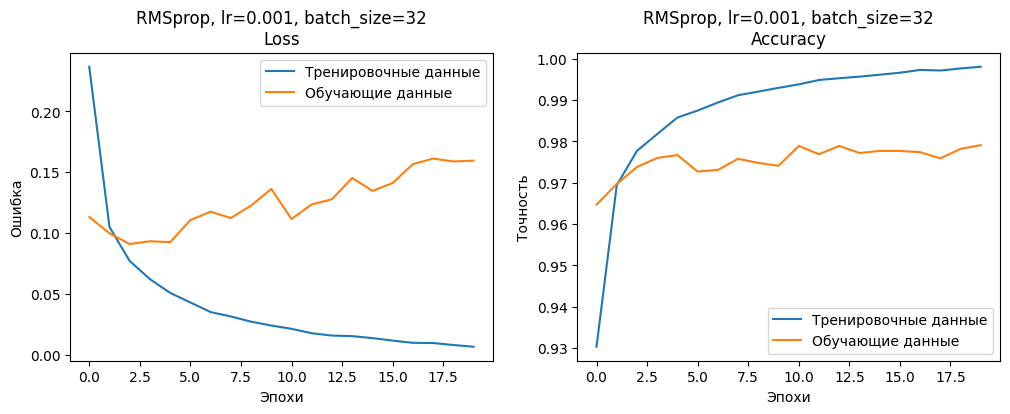

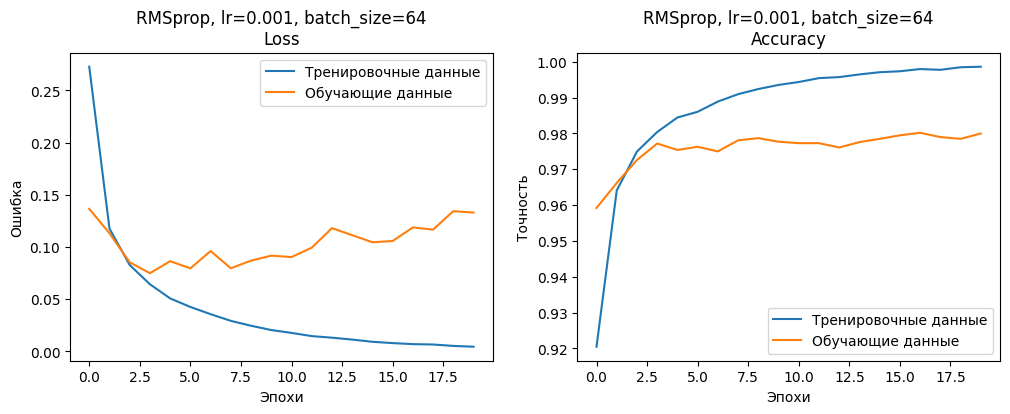

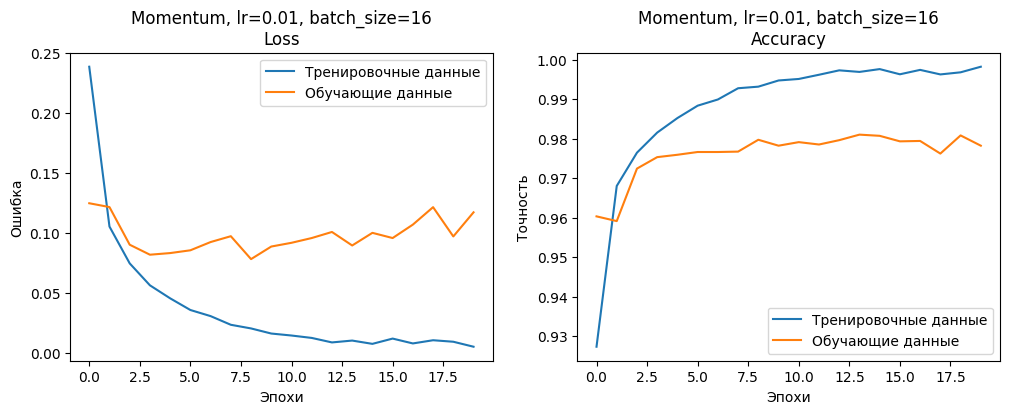

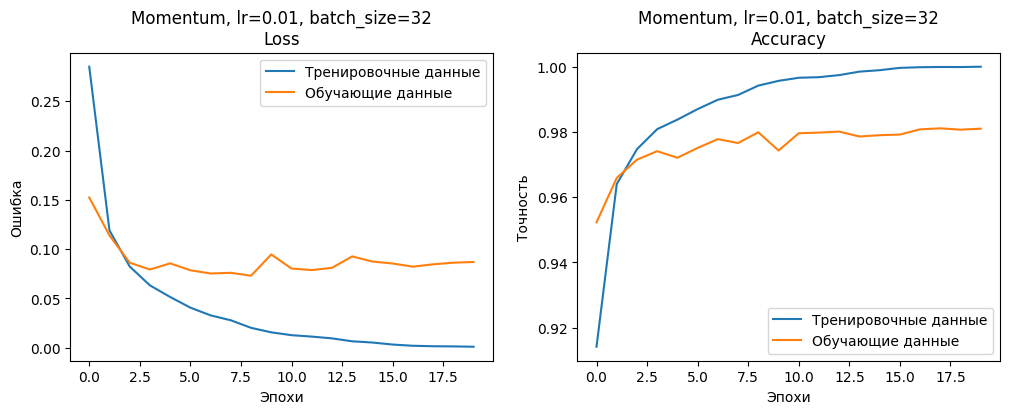

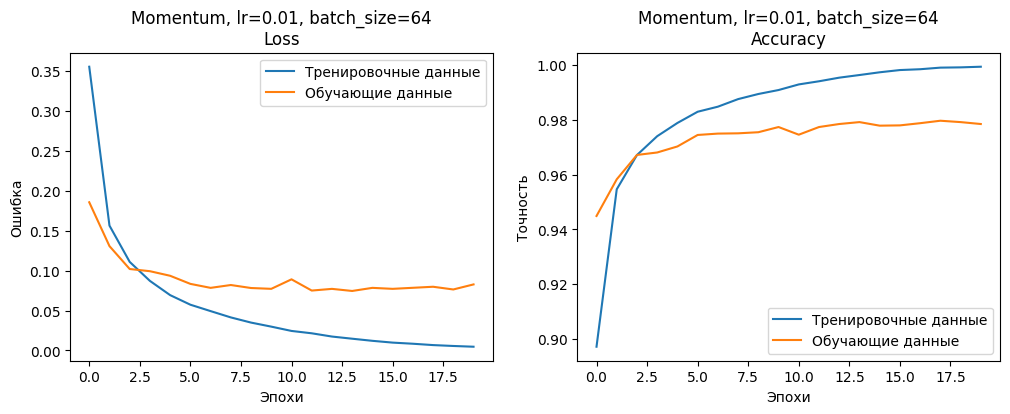

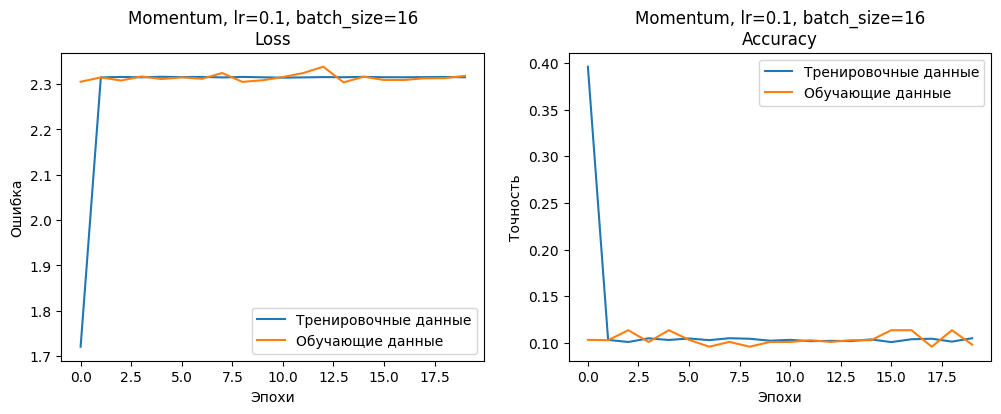

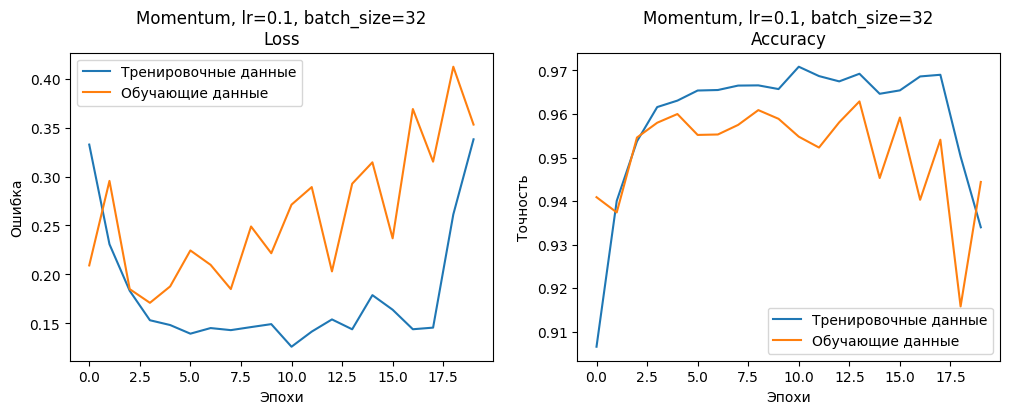

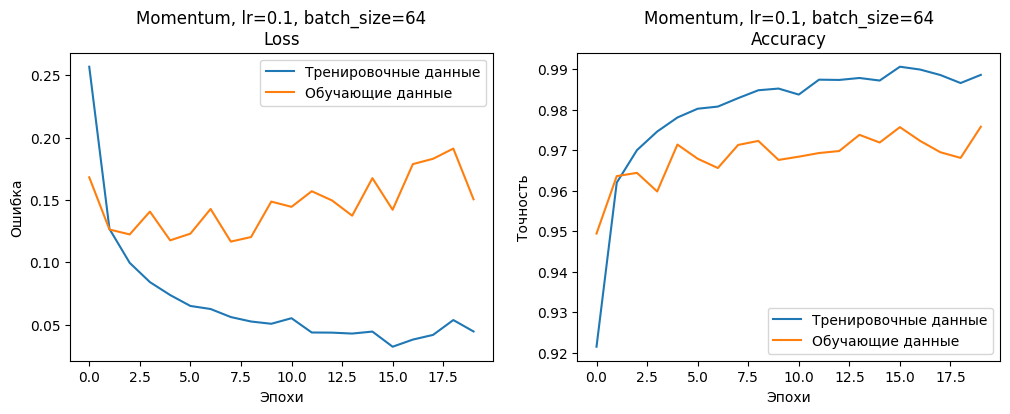

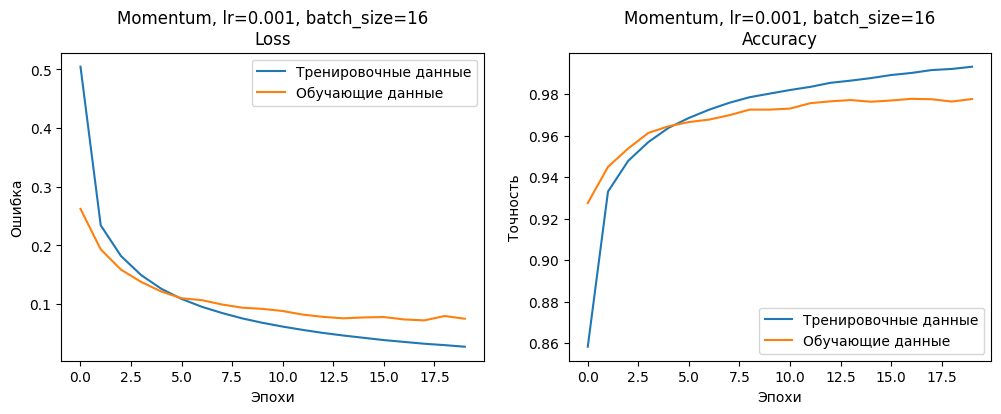

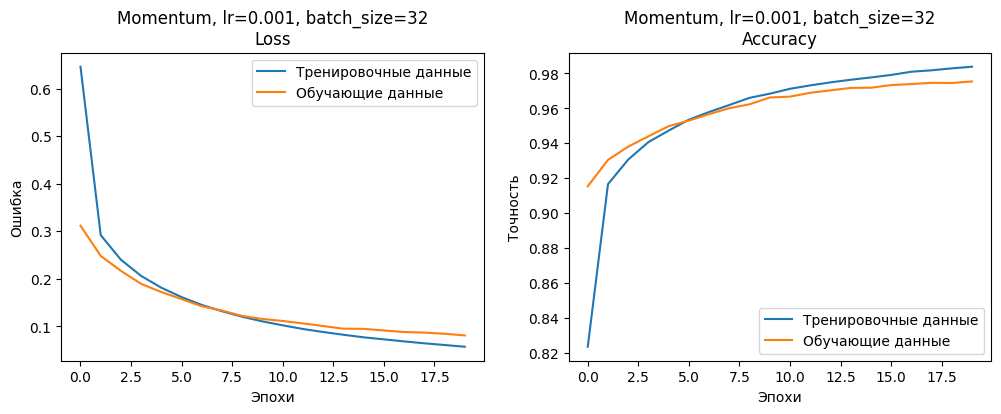

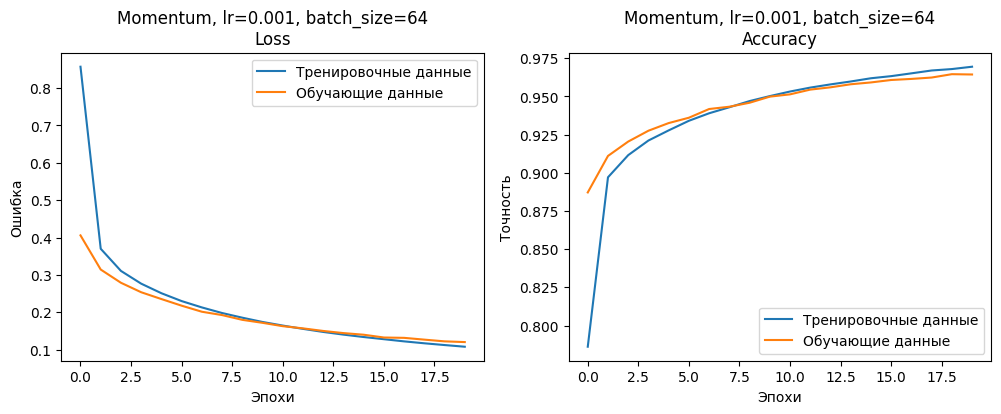

In [7]:
for key, history in history_dict.items():
    opt_name, lr, batch_size = key
    plt.figure(figsize=(12, 4))

    #График ошибки
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Тренировочные данные')
    plt.plot(history.history['val_loss'], label='Обучающие данные')
    plt.title(f'{opt_name}, lr={lr}, batch_size={batch_size}\nLoss')
    plt.xlabel('Эпохи')
    plt.ylabel('Ошибка')
    plt.legend()

    #График точности
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Тренировочные данные')
    plt.plot(history.history['val_accuracy'], label='Обучающие данные')
    plt.title(f'{opt_name}, lr={lr}, batch_size={batch_size}\nAccuracy')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()
    plt.show()

In [8]:
import pandas as pd

#Сбор результатов
results = []
for key, history in history_dict.items():
    opt_name, lr, batch_size = key
    val_accuracy = max(history.history['val_accuracy'])
    val_loss = min(history.history['val_loss'])
    results.append({
        'Optimizer': opt_name,
        'Learning Rate': lr,
        'Batch Size': batch_size,
        'Validation Accuracy': val_accuracy,
        'Validation Loss': val_loss
    })

results_df = pd.DataFrame(results)

#Сортировка по точности (по убыванию) и ошибке (по возрастанию)
sorted_df = results_df.sort_values(by=['Validation Accuracy', 'Validation Loss'], ascending=[False, True])
print(sorted_df)

   Optimizer  Learning Rate  Batch Size  Validation Accuracy  Validation Loss
4        SGD          0.100          32               0.9833         0.071724
3        SGD          0.100          16               0.9817         0.074436
15      Adam          0.001          16               0.9815         0.085197
5        SGD          0.100          64               0.9813         0.065159
28  Momentum          0.010          32               0.9811         0.073004
27  Momentum          0.010          16               0.9810         0.078296
17      Adam          0.001          64               0.9806         0.071912
26   RMSprop          0.001          64               0.9802         0.074909
24   RMSprop          0.001          16               0.9798         0.103201
29  Momentum          0.010          64               0.9797         0.074531
16      Adam          0.001          32               0.9793         0.078237
25   RMSprop          0.001          32               0.9791    